In [242]:
import serial
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize

In [243]:
# Note 1: This python script was designed to run with Python 3.
#
# Note 2: The script uses "pyserial" which must be installed.  If you have
#         previously installed the "serial" package, it must be uninstalled
#         first.
#
# Note 3: While this script is running you can not re-program the Arduino.
#         Before downloading a new Arduino sketch, you must exit this
#         script first.
arduinoComPort = "COM5"


# Set the baud rate
# NOTE1: The baudRate for the sending and receiving programs must be the same!
# NOTE2: For faster communication, set the baudRate to 115200 below
#        and check that the arduino sketch you are using is updated as well.
baudRate = 9600


# open the serial port
serialPort = serial.Serial(arduinoComPort, baudRate, timeout=1)


panMin = 0
panMax = 50
panStep = 1
tiltMin = 0
tiltMax = 60
tiltStep = 1
numRows = int(((tiltMax-tiltMin)/tiltStep +1)*((panMax-panMin)/panStep +1))
ptsrData = [[0]*4] * numRows
# print(ptsrData)
# ptsrData.astype(int)
# print(ptsrData)

i = 0
# main loop to read data from the Arduino, then display it
while i < numRows:
    # print(ptsrData)
    # ask for a line of data from the serial port, the ".decode()" converts the
    # data from an "array of bytes", to a string
    lineOfData = serialPort.readline().decode()

    # check if data was received
    if len(lineOfData) > 0:
        # print(lineOfData)
        # print(len(lineOfData))

        if len(lineOfData) == 3:
            if int(lineOfData) == 1: # done with scan
                print(ptsrData)
                i = numRows
            elif int(lineOfData) == 0: # restarting scan
                ptsrData = np.zeros((numRows,4))
                i = 0
        else: # continue with this scan
            # data was received, convert it into 4 integers
            panPos, tiltPos, senseVal = (int(x) for x in lineOfData.split(','))

            # # print the results
            # print("panPos = " + str(panPos), end="")
            # print(", tiltPos = " + str(tiltPos), end="")
            # print(", senseVal = " + str(senseVal))
            print([panPos, tiltPos, senseVal, 0.0])
            ptsrData[i] = [panPos, tiltPos, senseVal, 0.0]
            i = i+1

[0, 0, 596, 0.0]
[0, 1, 612, 0.0]
[0, 2, 632, 0.0]
[0, 3, 545, 0.0]
[0, 4, 444, 0.0]
[0, 5, 44, 0.0]
[0, 6, 49, 0.0]
[0, 7, 6, 0.0]
[0, 8, 106, 0.0]
[0, 9, 26, 0.0]
[0, 10, 159, 0.0]
[0, 11, 48, 0.0]
[0, 12, 62, 0.0]
[0, 13, 62, 0.0]
[0, 14, 57, 0.0]
[0, 15, 28, 0.0]
[0, 16, 0, 0.0]
[0, 17, 14, 0.0]
[0, 18, 5, 0.0]
[0, 19, 8, 0.0]
[0, 20, 35, 0.0]
[0, 21, 4, 0.0]
[0, 22, 5, 0.0]
[0, 23, 19, 0.0]
[0, 24, 142, 0.0]
[0, 25, 97, 0.0]
[0, 26, 73, 0.0]
[0, 27, 18, 0.0]
[0, 28, 43, 0.0]
[0, 29, 8, 0.0]
[0, 30, 39, 0.0]
[0, 31, 0, 0.0]
[0, 32, 4, 0.0]
[0, 33, 188, 0.0]
[0, 34, 53, 0.0]
[0, 35, 19, 0.0]
[0, 36, 5, 0.0]
[0, 37, 5, 0.0]
[0, 38, 6, 0.0]
[0, 39, 12, 0.0]
[0, 40, 23, 0.0]
[0, 41, 4, 0.0]
[0, 42, 5, 0.0]
[0, 43, 204, 0.0]
[0, 44, 243, 0.0]
[0, 45, 133, 0.0]
[0, 46, 5, 0.0]
[0, 47, 5, 0.0]
[0, 48, 6, 0.0]
[0, 49, 12, 0.0]
[0, 50, 4, 0.0]
[0, 51, 4, 0.0]
[0, 52, 144, 0.0]
[0, 53, 203, 0.0]
[0, 54, 225, 0.0]
[0, 55, 300, 0.0]
[0, 56, 300, 0.0]
[0, 57, 330, 0.0]
[0, 58, 350, 0.0]
[0, 59,

In [244]:
# print(ptsrData)
ptsrNP = np.array(ptsrData)
print(ptsrNP)


[[  0.   0. 596.   0.]
 [  0.   1. 612.   0.]
 [  0.   2. 632.   0.]
 ...
 [ 50.  58. 387.   0.]
 [ 50.  59. 400.   0.]
 [ 50.  60. 411.   0.]]


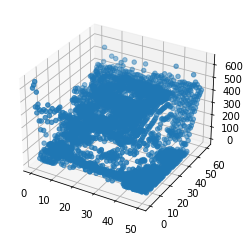

In [245]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(ptsrNP[:,0], ptsrNP[:,1], ptsrNP[:,2])


[[ 20.32 460.  ]
 [ 22.86 435.  ]
 [ 25.4  405.  ]
 [ 27.94 375.  ]
 [ 30.48 355.  ]
 [ 33.02 330.  ]
 [ 35.56 310.  ]
 [ 38.1  295.  ]
 [ 40.64 273.  ]
 [ 50.8  211.  ]
 [ 60.96 173.  ]
 [ 71.12 157.  ]
 [ 81.28 138.  ]
 [ 91.44 110.  ]
 [101.6  102.  ]
 [111.76  95.  ]
 [121.92  82.  ]
 [132.08  65.  ]
 [142.24  50.  ]
 [152.4   40.  ]]
[-3.64092814e-13  6.06928427e-10 -3.92946032e-07  1.21086134e-04
 -1.63738052e-02  1.69784848e-01  1.63890239e+02]
[[  0.           0.         596.          20.32      ]
 [  0.           1.         612.          20.32      ]
 [  0.           2.         632.          20.32      ]
 ...
 [ 50.          58.         387.          26.87803347]
 [ 50.          59.         400.          25.7124363 ]
 [ 50.          60.         411.          24.81102403]]


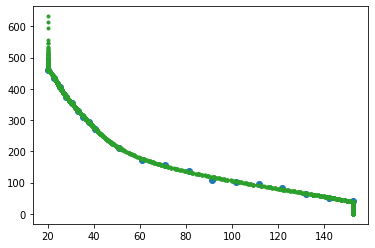

In [246]:
dsNP = np.load("calibration_data_0.npy")
dsTestNP = np.load("calibration_data_test.npy")

dsNP = np.array(ds)
print(dsNP)

c = np.polyfit(dsNP[:,1],dsNP[:,0],6)
print(c)

xp = np.linspace(np.amin(dsNP[:,1]),np.amax(dsNP[:,1]), 100)
# xp = np.linspace(0,400, 100)
p = np.poly1d(c)

i = 0
while i < numRows:
    if ptsrNP[i,2]>np.amax(dsNP[:,1]):
        ptsrNP[i,3] = np.amin(dsNP[:,0])
    elif ptsrNP[i,2]<np.amin(dsNP[:,1]):
        ptsrNP[i,3] = np.amax(dsNP[:,0])
    else:
        ptsrNP[i,3] = p(ptsrNP[i,2])
    i = i+1

# i = 0
# while i < numRows:
#     if ptsrNP[i,3]>100:
#         ptsrNP[i,3] = 0
#     elif ptsrNP[i,3]<10:
#         ptsrNP[i,3] = 0
#     else:
#         ptsrNP[i,3] = p(ptsrNP[i,2])
#     i = i+1

print(ptsrNP)

fig = plt.figure()
ax = plt.axes()
plt.plot(dsNP[:,0],dsNP[:,1], 'o', p(xp),xp, '-',ptsrNP[:,3],ptsrNP[:,2],'.')

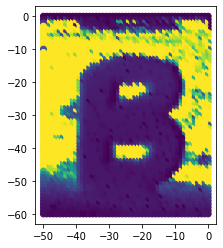

In [247]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP[:,0],-ptsrNP[:,1],s=None,c=ptsrNP[:,3])
ax.set_aspect('equal', 'box')

In [250]:
# np.save("scan2",ptsrNP)

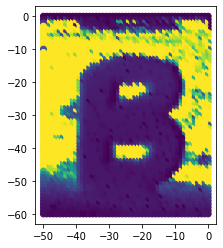

In [252]:
ptsrNP_loaded = np.load("scan2.npy")
fig = plt.figure()
ax = plt.axes()
plt.scatter(-ptsrNP[:,0],-ptsrNP[:,1],s=None,c=ptsrNP[:,3])
ax.set_aspect('equal', 'box')